# Quantile Regressions

This notebook illustrates quantile regressions.

As an alternative, consider the [QuantileRegressions.jl](https://github.com/pkofod/QuantileRegressions.jl) package.

## Load Packages and Extra Functions

In [1]:
using LinearAlgebra, Printf, DelimitedFiles, Statistics

include("jlFiles/printmat.jl")
include("jlFiles/QuantRegrIRLSPs.jl");          #function for quantile regression

In [2]:
using Plots

#pyplot(size=(600,400))            #pyplot() or gr()
gr(size=(480,320))
default(fmt = :png)

## Loading Data

In [3]:
xx  = readdlm("Data/FFdFactors.csv",',',skipstart=1)
xx  = xx[:,2]            #equity market excess returns

y = xx[2:end]            #dependent variable
x = xx[1:end-1]          #regressor in an AR(1)

T   = size(y,1)
println("Sample size: $T")

Sample size: 15355


## A Function for Quantile Regressions

The next cell uses a function `QuanRegrIRLSPs` (from `include("jlFiles/QuantRegrIRLSPs.jl")` above) which estimates a quantile regression. It uses a simple iterative (re-)weighted least squares (IRLS) approach. It can be shown that a linear programming approach gives almost identical results for this data set. However, it seems that the iterative approach is quicker in really large data sets. The function returns several different calculations of the standard errors: see the code below and the lecture notes for details.

The subsequent cells calculate and show the results. The calculations take some time.

In [4]:
xGrid = quantile(x,0.01:0.01:0.99)                 #quantiles of the regressor, for plots
xGrid = [ones(size(xGrid)) xGrid]

qM = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]           #quantiles

cx = [ones(T) x]                                   #[constant regressors]

bM    = fill(NaN,length(qM),2)                     #to store regression coeffs
qPred = fill(NaN,length(qM),size(xGrid,1))         #to store predicted values
for i = 1:length(qM)
    #local b_q            #local/global is needed in script
    b_q        = QuantRegrIRLSPs(y,cx,qM[i])[1]
    bM[i,:]    = b_q
    qPred[i,:] = xGrid*b_q
end

printblue("quantile regression coefs:\n")
printmat(bM,colNames=["c","slope"],rowNames=string.(qM),cell00="quantile")

printred("\nThe function QuantRegrIRLSPs also outputs different variance-covariance matrices. Compare them.")

quantile regression coefs:

quantile         c     slope
0.01        -2.568     0.139
0.05        -1.433     0.158
0.25        -0.410     0.146
0.5          0.047     0.067
0.75         0.477     0.024
0.95         1.409    -0.028
0.99         2.582    -0.188


The function QuantRegrIRLSPs also outputs different variance-covariance matrices. Compare them.


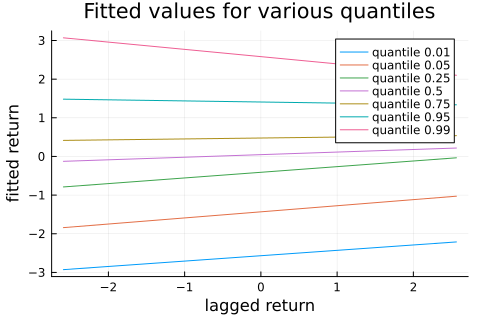

In [5]:
lab = permutedims(["quantile $(qM[i])" for i=1:length(qM)])

p1 = plot( xGrid[:,2],qPred',
           label = lab,
           xlabel = "lagged return",
           ylabel = "fitted return",
           title = "Fitted values for various quantiles" )
display(p1)